<a href="https://colab.research.google.com/github/Ashwinikh297/R.Discriptive-Statistics/blob/main/Assignment_4_Q_2(SLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [49]:
# Load the dataset
dataset=pd.read_csv('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Simple%20Linear%20Regression/Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


##EDA and Visualization

In [50]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [51]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [52]:
data1 = dataset.rename(columns={'YearsExperience':'YE','Salary':'Sal'}, inplace=False)
data1

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [53]:
print(skew(data1.YE))

0.3603123252525561


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


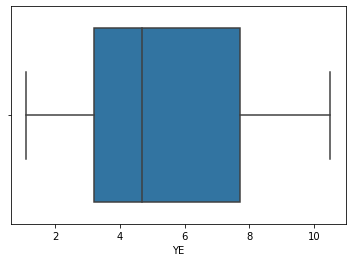

In [54]:
sns.boxplot(data1['YE'], orient = 'h')

In [55]:
#The data for Year Experience is skewed right.
#All the observations lies in the intervals of approximately 3 to 8
#We can say that the median years of experience is 5.2 years.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


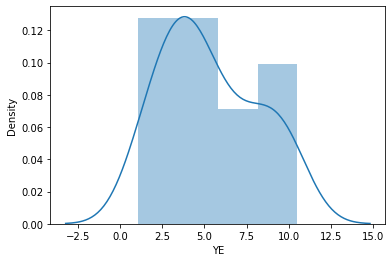

In [56]:
sns.distplot(data1['YE'])

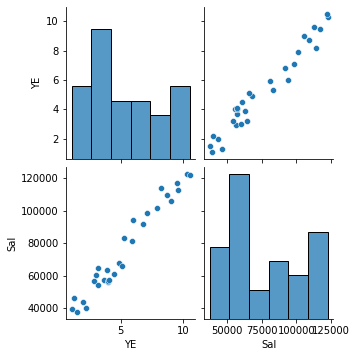

In [59]:
sns.pairplot(data1)

##Correlation Analysis

In [60]:
data1.corr()


,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


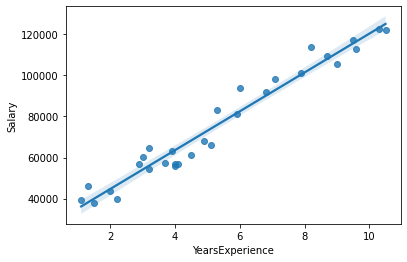

In [61]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

##Model Building

In [62]:
model=smf.ols('Salary~YearsExperience',data=dataset).fit()

##Model testing

In [63]:
# Finding Coefficient parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [64]:
#finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64, Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [65]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

##Model Predictions

In [66]:
# Manual prediction for say 2 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [67]:
# Automatic Prediction for say 2 & 6Years Experience
new_data=pd.Series([2,6])
new_data

0    2
1    6
dtype: int64

In [68]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2
1,6


In [70]:
model.predict(data_pred)

0    44692.124842
1    82491.974127
dtype: float64

In [71]:
 #From above we can say that this is the best model.